In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers
import matplotlib.pyplot as plt

In [2]:
model = models.Sequential()
#remember 3x3 because we are using color images
model.add(Conv2D(32,(3,3), activation= "relu", input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation= "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation= "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation= "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [3]:
train_datagen = ImageDataGenerator(
     rescale=1./255,
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True
     )

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory("/kaggle/input/cnn-data-sources/cats_and_dogs/train", 
                                  target_size=(150,150 ),#to be the same that te input
                                  batch_size=32,
                                  class_mode="binary"
                                  )

validation_generator = test_datagen.flow_from_directory("/kaggle/input/cnn-data-sources/cats_and_dogs/validation", 
                                  target_size=(150,150),#to be the same that te input
                                  batch_size=32,
                                  class_mode="binary"
                                  )
                                  

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
checkpoint = ModelCheckpoint("model_dogs_cats.hdf5", monitor ="val_accuracy", verbose = 1, save_best_only=True)

In [7]:
model.compile(loss="binary_crossentropy", optimizer = optimizers.Adam(), metrics=["accuracy"])

In [8]:
hist = model.fit(train_generator, steps_per_epoch=2000/32, #the data that we have in train_generator
                epochs=100,                        # & batch size
                validation_data=validation_generator,
                validation_steps=100//32,#the data that we have in validation_generator
                callbacks=[checkpoint])

Epoch 1/100
63/62 [==============================] - ETA: 0s - loss: 0.7038 - accuracy: 0.5230
Epoch 1: val_accuracy improved from -inf to 0.47917, saving model to model_dogs_cats.hdf5
62/62 [==============================] - 29s 333ms/step - loss: 0.7038 - accuracy: 0.5230 - val_loss: 0.6924 - val_accuracy: 0.4792
Epoch 2/100
63/62 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5090
Epoch 2: val_accuracy improved from 0.47917 to 0.52083, saving model to model_dogs_cats.hdf5
62/62 [==============================] - 16s 262ms/step - loss: 0.6934 - accuracy: 0.5090 - val_loss: 0.6926 - val_accuracy: 0.5208
Epoch 3/100
63/62 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5230
Epoch 3: val_accuracy improved from 0.52083 to 0.59375, saving model to model_dogs_cats.hdf5
62/62 [==============================] - 16s 259ms/step - loss: 0.6918 - accuracy: 0.5230 - val_loss: 0.6605 - val_accuracy: 0.5938
Epoch 4/100
63/62 [========================

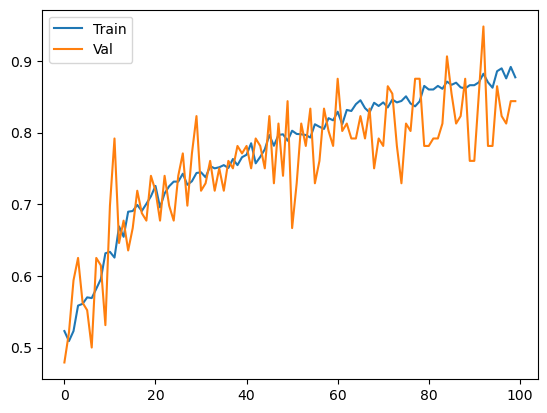

In [12]:
plt.plot(hist.history["accuracy"], label = "Train")
plt.plot(hist.history["val_accuracy"], label = "Val")
plt.legend()
plt.show()

In [13]:
test_generator = test_datagen.flow_from_directory("/kaggle/input/cnn-data-sources/cats_and_dogs/test", 
                                  target_size=(150,150),#to be the same that te input
                                  batch_size=32,
                                  class_mode="binary"
                                  )                                

Found 1000 images belonging to 2 classes.


In [14]:
from keras.models import clone_model
model2 = clone_model(model)

In [15]:
model2.load_weights("/kaggle/working/model_dogs_cats.hdf5")

In [17]:
model2.compile(loss="binary_crossentropy", optimizer = optimizers.Adam(), metrics=["accuracy"])

In [18]:
model2.evaluate(test_generator)

32/32 [==============================] - 6s 181ms/step - loss: 0.4490 - accuracy: 0.8340


[0.4489765465259552, 0.8339999914169312]